# COVID-19
千葉県市川市の感染データを解析します。

## データの読み込み

In [1]:
import pandas as pd

df = pd.read_csv('corona.csv')

In [2]:
df

,分類,市内,県内,年,性別,職業,推定感染経路,発症日,検査確定日,行動歴
0,患者,1,6,20,男性,会社員,,2月2日,2月13日,
1,患者,2,7,70,女性,無職,ジム関係,2月14日,2月20日,
2,患者,3,9,60,女性,教員,ジム関係,2月12日,2月21日,
3,患者,4,13,60,男性,無職,クルーズ船,2月22日,2月25日,
4,患者,5,16,80,女性,無職,ジム関係,2月16日,3月3日,
5,患者,6,17,50,男性,会社員,,2月24日,3月5日,
6,患者,7,18,50,男性,福祉事業所職員,福祉事業所関係,2月24日,3月6日,
7,患者,8,19,80,女性,無職,福祉事業所関係,2月26日,3月6日,
8,患者,9,20,60,男性,無職,県内19家族,3月1日,3月6日,
9,患者,10,21,60,女性,無職,県内19家族,3月2日,3月6日,


## 要約統計量

In [3]:
df.describe().loc[:,"年"]

count    89.000000
mean     52.584270
std      24.795898
min      10.000000
25%      30.000000
50%      50.000000
75%      80.000000
max      90.000000
Name: 年, dtype: float64

## ヒストグラム（年齢）

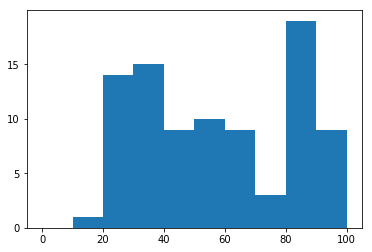

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.yticks([0,5,10,15,20])
plt.hist(df["年"], range=(0, 100));